# EDU RANK PREDICTION on THE

## Introduction

This notebook is a part of the project for the department of Data Management at Dokuz Eylul University. 




In [1]:
# how can ı const the path

In [2]:
DATA_PATH = "../data/"
SRC_PATH = "../src/"



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the data
data = pd.read_excel(DATA_PATH + "THE.xlsx")

In [5]:
data = data.iloc[:2092] # drop the rank column has NaN values

In [6]:
data.shape # 2092 rows and 29 columns


(2092, 29)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         2092 non-null   int64  
 1   rank                               2092 non-null   object 
 2   name                               2092 non-null   object 
 3   scores_overall                     2092 non-null   object 
 4   scores_overall_rank                2092 non-null   int64  
 5   scores_teaching                    2092 non-null   float64
 6   scores_teaching_rank               2092 non-null   int64  
 7   scores_research                    2092 non-null   float64
 8   scores_research_rank               2092 non-null   int64  
 9   scores_citations                   2092 non-null   float64
 10  scores_citations_rank              2092 non-null   int64  
 11  scores_industry_income             2092 non-null   float

In [8]:
data.isnull().sum()

rank_order                            0
rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                   0
scores_teaching                       0
scores_teaching_rank                  0
scores_research                       0
scores_research_rank                  0
scores_citations                      0
scores_citations_rank                 0
scores_industry_income                0
scores_industry_income_rank           0
scores_international_outlook          0
scores_international_outlook_rank     0
record_type                           0
member_level                          0
url                                   0
nid                                   0
location                              0
stats_number_students                 0
stats_student_staff_ratio             0
stats_pc_intl_students                0
stats_female_male_ratio              81
aliases                               0


In [9]:
#data.loc[data['closed'] == 1] No closed universities
data.drop('closed', axis=1, inplace=True)

In [10]:
data['rank'].value_counts() 

rank
1501+        591
1201–1500    302
601–800      203
1001–1200    200
801–1000     195
            ... 
44             1
43             1
42             1
41             1
89             1
Name: count, Length: 142, dtype: int64

In [11]:
data['rank'] = data['rank'].astype(str)
data['stats_number_students'] = data['stats_number_students'].str.replace(',', '').astype(float)


In [12]:
# 1-500, 501-1000, 1001-1200, 1201-1400, 1401-1500, 1501-1600, 1601-1700, 1701-1800, 1800+

# Convert the 'rank' column to integers, handling non-numeric values
data['label'] = data['rank_order'].apply(lambda x: '0-500' if x <= 5000 else '500-1000' if x <= 10000 else '1000-1200' if x <= 12000 else '1200-1400' if x <= 14000 else '1400-1500' if x <= 15000 else '1500-1600' if x <= 16000 else '1600-1700' if x <= 17000 else '1700-1800' if x <= 18000 else '1800+')

In [13]:
data['label'].value_counts()

label
0-500        500
500-1000     500
1800+        292
1000-1200    200
1200-1400    200
1400-1500    100
1500-1600    100
1600-1700    100
1700-1800    100
Name: count, dtype: int64

In [14]:
target = data['label']

In [15]:
data.drop(['rank'], axis=1, inplace=True)


In [16]:
data

,rank_order,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,unaccredited,disabled,label
0,10,University of Oxford,98.5,10,96.8,5,100.0,1,98.8,8,...,United Kingdom,22095.0,10.8,43%,51 : 49,University of Oxford,"Computer Science,Languages, Literature & Lingu...",False,False,0-500
1,20,Massachusetts Institute of Technology,98.1,20,99.2,1,96.0,11,99.7,1,...,United States,11836.0,8.0,33%,42 : 58,Massachusetts Institute of Technology,"Biological Sciences,Electrical & Electronic En...",False,False,0-500
2,30,Harvard University,97.7,30,97.3,4,99.9,2,99.3,3,...,United States,22584.0,10.0,25%,52 : 48,Harvard University,"Archaeology,Mathematics & Statistics,Art, Perf...",False,False,0-500
3,40,Princeton University,97.5,40,98.3,2,98.0,6,98.9,7,...,United States,8378.0,7.8,23%,47 : 53,Princeton University,"Chemistry,Languages, Literature & Linguistics,...",False,False,0-500
4,50,University of Cambridge,97.4,50,95.9,6,99.9,3,97.6,17,...,United Kingdom,20980.0,11.5,38%,49 : 51,University of Cambridge,"History, Philosophy & Theology,Biological Scie...",False,False,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,20880,Yanshan University,10.5–25.1,20880,20.2,1483,12.0,1520,39.7,1353,...,China,39528.0,13.0,1%,37 : 63,Yanshan University,"Art, Performing Arts & Design,Languages, Liter...",False,False,1800+
2088,20890,Yeditepe University,10.5–25.1,20890,20.5,1454,12.1,1506,22.1,1795,...,Turkey,17506.0,29.9,6%,56 : 44,Yeditepe University,"Mechanical & Aerospace Engineering,Sociology,O...",False,False,1800+
2089,20900,Yerevan State University,10.5–25.1,20900,24.8,1098,8.8,1993,8.7,2052,...,Armenia,13923.0,8.0,3%,53 : 47,Yerevan State University,"Mathematics & Statistics,Biological Sciences,P...",False,False,1800+
2090,20910,Yuriy Fedkovych Chernivtsi National University,10.5–25.1,20910,18.0,1705,9.8,1841,8.8,2050,...,Ukraine,12377.0,12.5,1%,49 : 51,Yuriy Fedkovych Chernivtsi National University,"Electrical & Electronic Engineering,Archaeolog...",False,False,1800+


In [17]:
data.drop(columns=['name','url','aliases','unaccredited'], inplace=True)

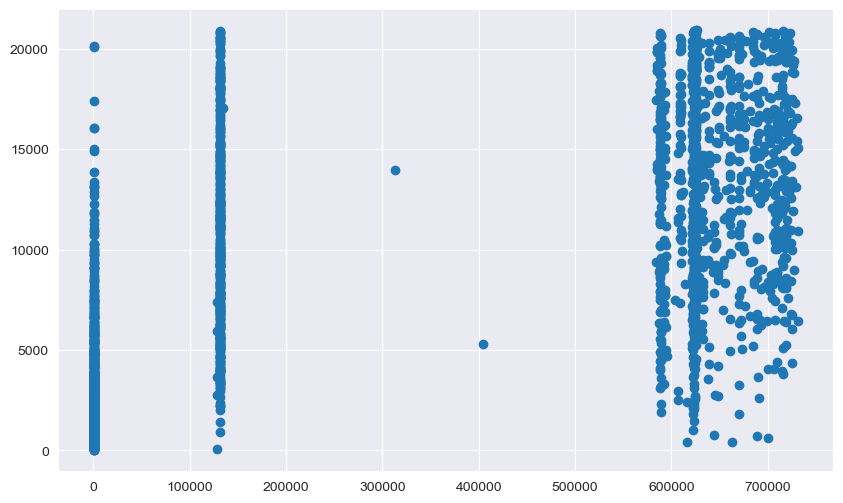

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(data['nid'],data['rank_order'])

In [19]:
data['scores_overall'] = data['scores_overall'].str.split('–').str[0].astype(float)



In [20]:
data[['rank_order','member_level']].corr()

,rank_order,member_level
rank_order,1.000000,-0.231823
member_level,-0.231823,1.000000


In [21]:
data['location'].value_counts() 

location
United States     174
Japan             119
United Kingdom    107
India             107
China              94
                 ... 
Luxembourg          1
Palestine           1
Bahrain             1
Oman                1
Armenia             1
Name: count, Length: 115, dtype: int64

In [22]:
# location if country count less than 10, convert to 'Other'
country_count = data['location'].value_counts()
data['location'] = data['location'].apply(lambda x: 'Other' if country_count[x] < 6 else x)



In [23]:
data.loc[data['location'] == 'Other']

,rank_order,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,...,member_level,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,disabled,label
16,170,89.9,170,78.4,24,93.6,15,95.7,41,100.0,...,6,504,Other,34388.0,21.0,26%,49 : 51,"Computer Science,Chemistry,Economics & Econome...",False,0-500
29,300,81.8,300,65.8,51,79.3,30,94.5,54,99.9,...,6,634,Other,26044.0,17.1,29%,48 : 52,"Psychology,Geology, Environmental, Earth & Mar...",False,0-500
180,1810,59.7,1810,37.7,377,39.0,274,90.7,104,70.4,...,11,1027,Other,11573.0,19.2,46%,54 : 46,"General Engineering,Communication & Media Stud...",False,0-500
219,2200,55.8,2200,31.0,693,37.4,302,87.5,171,69.0,...,0,131534,Other,9701.0,8.5,36%,NaN,"Law,Languages, Literature & Linguistics,Civil ...",False,0-500
237,2380,55.8,2380,39.2,333,39.5,261,77.1,401,81.3,...,0,131698,Other,5860.0,22.1,52%,54 : 46,"Computer Science,Physics & Astronomy,Economics...",False,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,20410,10.5,20410,20.2,1481,11.2,1627,20.8,1825,26.6,...,0,677010,Other,22458.0,13.5,4%,65 : 35,"Sport Science,Economics & Econometrics,Mathema...",False,1800+
2053,20540,10.5,20540,20.7,1444,8.8,1991,10.5,2022,24.0,...,0,131353,Other,20855.0,10.9,1%,60 : 40,"Medicine & Dentistry,Geology, Environmental, E...",False,1800+
2064,20650,10.5,20650,15.1,1901,9.9,1824,29.2,1613,21.4,...,0,670626,Other,23677.0,26.9,2%,40 : 60,"Archaeology,Mechanical & Aerospace Engineering...",False,1800+
2066,20670,10.5,20670,14.2,1950,10.6,1711,39.3,1361,21.0,...,0,707981,Other,23476.0,18.3,0%,51 : 49,"General Engineering,Mathematics & Statistics,L...",False,1800+


In [24]:
data['location'].value_counts(  )

location
United States     174
Japan             119
United Kingdom    107
India             107
Other             102
                 ... 
Norway              6
Philippines         6
Peru                6
Sri Lanka           6
Slovakia            6
Name: count, Length: 62, dtype: int64

In [25]:
# 2. Target Encoding
from sklearn.preprocessing import LabelEncoder



In [30]:
le = LabelEncoder()
data['location'] = le.fit_transform(data['location'])
# hot encoding
one_hot = pd.get_dummies(data['record_type'], drop_first=True), pd.get_dummies(data['disabled'], drop_first=True),








In [32]:
data = pd.concat([data, one_hot], axis=1)

TypeError: cannot concatenate object of type '<class 'tuple'>'; only Series and DataFrame objs are valid